In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import multivariate_normal


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
finance_df=pd.read_csv('train_data.csv')
finance_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,62074.0,-1.993953,1.734986,-1.108037,-2.671817,1.605319,3.041992,-0.417771,1.438007,0.945437,...,-0.303532,-0.708199,0.047110,1.008409,0.234363,0.768581,0.697625,0.354542,14.83,0
227841,32193.0,-0.440396,1.062920,1.582218,-0.029761,0.040967,-0.903627,0.730326,-0.108175,-0.513163,...,-0.215794,-0.532224,-0.024762,0.382581,-0.164620,0.068836,0.269144,0.123483,2.58,0
227842,163864.0,0.827820,-2.649344,-3.161235,0.209209,-0.561331,-1.570386,1.612531,-0.930219,-1.318562,...,0.349915,0.002268,-0.746698,0.171847,0.247576,0.936557,-0.258164,0.037868,748.04,0
227843,122571.0,-1.523903,-6.287060,-2.638246,1.330015,-1.672002,1.957509,1.359226,0.081727,0.753151,...,1.329127,0.001210,-1.360187,-1.507703,-1.183927,0.578076,-0.328557,0.229935,1771.50,0


In [4]:
# 1. Basic Statistics
finance_df_descr=finance_df.describe()
finance_df_descr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


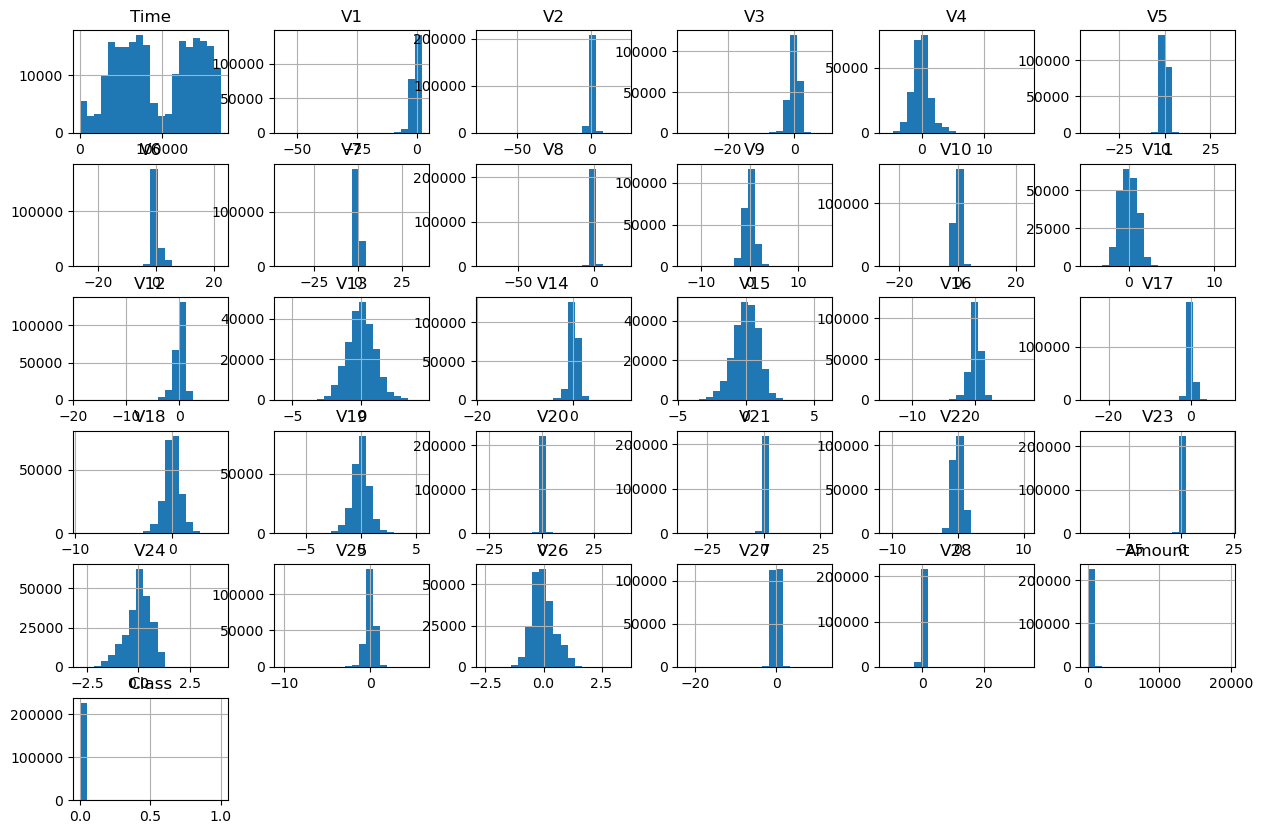

In [5]:
# Step 2: Data Visualization
# Create histograms for each feature
finance_df.hist(bins=20, figsize=(15, 10))
plt.show()

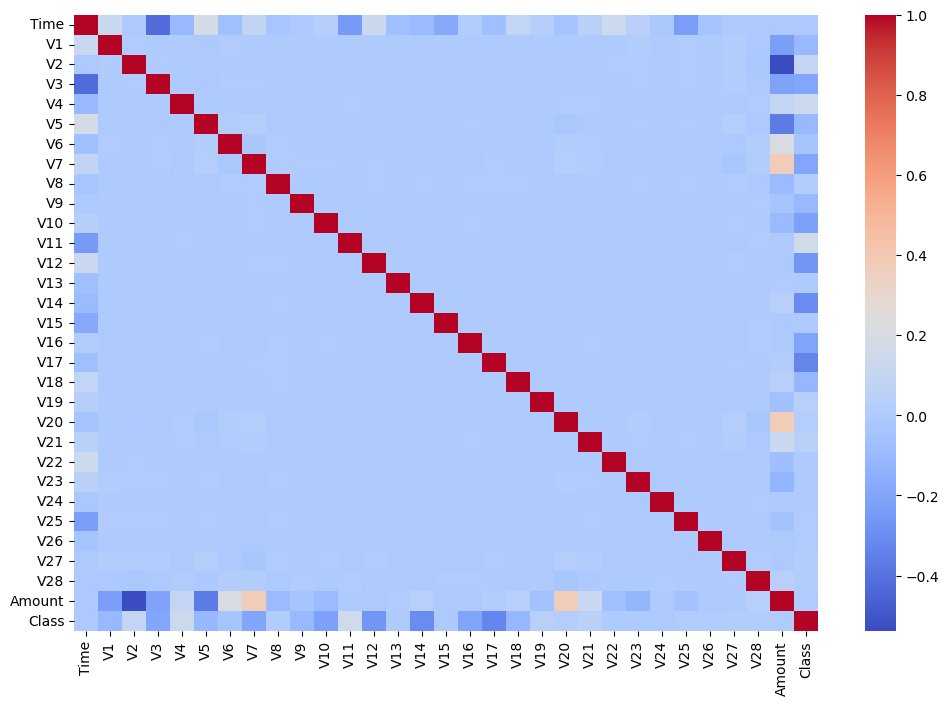

In [6]:
# Step 3: Correlation Analysis
correlation_matrix = finance_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.show()

In [7]:
# Step 4: Time and Amount Analysis
fraudulent_transactions = finance_df[finance_df['Class'] == 1]
non_fraudulent_transactions = finance_df[finance_df['Class'] == 0]

In [8]:
# Compare 'Time' and 'Amount' statistics for fraud and non-fraud transactions
time_stats = pd.DataFrame({'Fraudulent': fraudulent_transactions['Time'].describe(),
                            'Non-Fraudulent': non_fraudulent_transactions['Time'].describe()})
amount_stats = pd.DataFrame({'Fraudulent': fraudulent_transactions['Amount'].describe(),
                              'Non-Fraudulent': non_fraudulent_transactions['Amount'].describe()})
print("Time Statistics:")
print(time_stats)
print("\nAmount Statistics:")
print(amount_stats)

Time Statistics:
          Fraudulent  Non-Fraudulent
count     394.000000   227451.000000
mean    80144.459391    94778.158337
std     46947.027931    47497.567552
min       472.000000        0.000000
25%     41250.500000    54208.000000
50%     74647.500000    84617.000000
75%    122960.500000   139354.000000
max    170348.000000   172792.000000

Amount Statistics:
        Fraudulent  Non-Fraudulent
count   394.000000   227451.000000
mean    127.306523       88.455144
std     264.533907      248.066088
min       0.000000        0.000000
25%       1.000000        5.640000
50%      11.395000       22.000000
75%     106.385000       77.000000
max    2125.870000    19656.530000


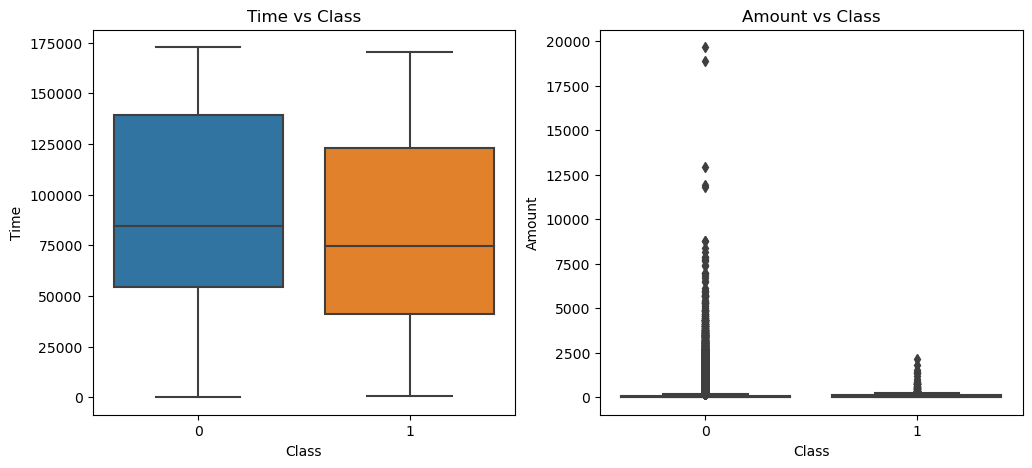

In [9]:
# Visualize Time and Amount for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Time', data=finance_df)
plt.title('Time vs Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=finance_df)
plt.title('Amount vs Class')

plt.show()

In [10]:
# Step 5: Class Imbalance
class_counts = finance_df['Class'].value_counts()
print("\nClass Counts:")
print(class_counts)


Class Counts:
0    227451
1       394
Name: Class, dtype: int64


In [11]:
# Step 6: Sampling Techniques
# Split data into features and target variable
X = finance_df.drop('Class', axis=1)
y = finance_df['Class']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 7: Model Evaluation Metrics (Using Naïve Bayes as an example)
# Standardize features
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM':SVC(probability= True),  # We enable probability estimates for ROC curve
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(random_state=42, scale_pos_weight=1)  # Adjust scale_pos_weight for class imbalance

}

# Initialize dictionaries to store results
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}

In [15]:
# Apply oversampling and undersampling techniques
samplers = {'Oversampling': RandomOverSampler(sampling_strategy='minority', random_state=42),'Undersampling': RandomUnderSampler(sampling_strategy='majority', random_state=42)}

In [16]:
for sampler_name, sampler in samplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    
for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

In [17]:
# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [18]:
# Store results
precision_scores[(sampler_name, model_name)] = precision
recall_scores[(sampler_name, model_name)] = recall
f1_scores[(sampler_name, model_name)] = f1
roc_auc_scores[(sampler_name, model_name)] = roc_auc

# Print evaluation metrics
print("Precision Scores:")
print(precision_scores)
print("\nRecall Scores:")
print(recall_scores)
print("\nF1-Scores:")
print(f1_scores)
print("\nROC AUC Scores:")
print(roc_auc_scores)

Precision Scores:
{('Undersampling', 'XGBoost'): 0.03804347826086957}

Recall Scores:
{('Undersampling', 'XGBoost'): 0.9}

F1-Scores:
{('Undersampling', 'XGBoost'): 0.07300115874855158}

ROC AUC Scores:
{('Undersampling', 'XGBoost'): 0.984404052836326}


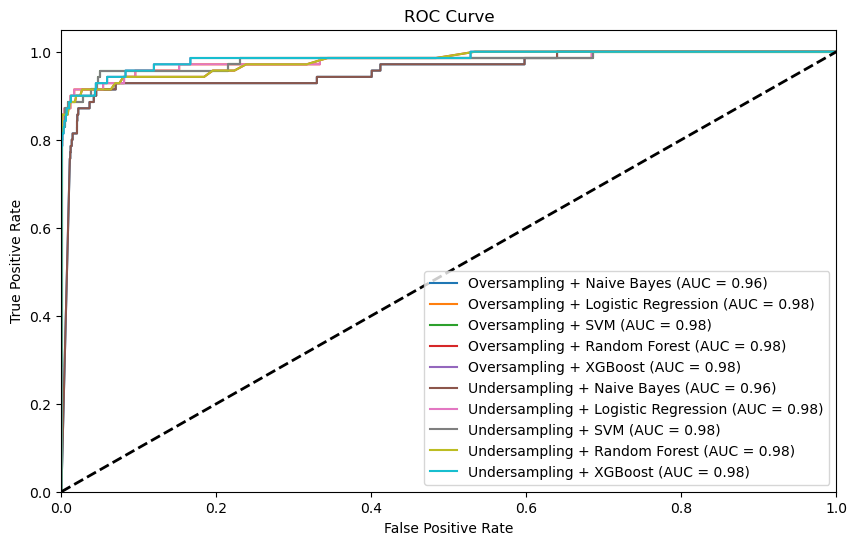

In [19]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for sampler_name, sampler in samplers.items():
    for model_name, model in models.items():
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{sampler_name} + {model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Comparing the results of 1 with 2 and there is incremental gain in Model 2 (XGBoost)
#### Model 1 (SVM with undersampling):

Precision: 0.109

Recall: 0.886

F1-Score: 0.194

ROC AUC: 0.980

#### Model 2 (XGBoost with undersampling):

Precision: 0.038

Recall: 0.900

F1-Score: 0.073

ROC AUC: 0.984

#### Comparison:

Recall: Model 2 (XGBoost) has a slightly higher recall (0.900) compared to Model 1 (SVM) (0.886). This means that XGBoost captures a higher proportion of actual fraudulent transactions.

Precision: Model 1 (SVM) has significantly higher precision (0.109) compared to Model 2 (XGBoost) (0.038). SVM has a lower rate of false positives compared to XGBoost.

F1-Score: The F1-Score for both models is relatively low, but Model 1 (SVM) has a higher F1-Score (0.194) compared to Model 2 (XGBoost) (0.073). This indicates that SVM achieves a better balance between precision and recall.

ROC AUC: Both models have high ROC AUC scores, but Model 2 (XGBoost) has a slightly higher ROC AUC (0.984) compared to Model 1 (SVM) (0.980). ROC AUC measures the model's ability to distinguish between classes.

In [20]:
# Define a function to create the ANN model
def create_ann_model(activation='relu', dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [21]:
# Create a KerasClassifier for use with GridSearchCV or RandomizedSearchCV
ann_classifier = KerasClassifier(build_fn=create_ann_model, verbose=0)

# Define hyperparameter grid for grid search or random search
param_grid = {
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2],
    'optimizer': ['adam'],
    'batch_size': [],
    'epochs': [10]
}

In [22]:
# Perform grid search or random search for hyperparameter tuning
grid_search = GridSearchCV(estimator=ann_classifier, param_grid=param_grid, scoring='f1', cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search_result.best_params_

# Train the final model with the best parameters
final_ann_model = create_ann_model(activation=best_params['activation'],dropout_rate=best_params['dropout_rate'],optimizer=best_params['optimizer'])
final_ann_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'])

1899/1899 [==============================] - 8s 4ms/step
Epoch 1/10
5697/5697 [==============================] - 41s 7ms/step - loss: 2.6799 - accuracy: 0.9970
Epoch 2/10
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0395 - accuracy: 0.9981
Epoch 3/10
5697/5697 [==============================] - 38s 7ms/step - loss: 0.0357 - accuracy: 0.9980
Epoch 4/10
5697/5697 [==============================] - 37s 7ms/step - loss: 0.0398 - accuracy: 0.9982
Epoch 5/10
5697/5697 [==============================] - 37s 7ms/step - loss: 0.0404 - accuracy: 0.9982
Epoch 6/10
5697/5697 [==============================] - 38s 7ms/step - loss: 0.1836 - accuracy: 0.9982
Epoch 7/10
5697/5697 [==============================] - 37s 7ms/step - loss: 0.0814 - accuracy: 0.9981
Epoch 8/10
5697/5697 [==============================] - 37s 6ms/step - loss: 0.0393 - accuracy: 0.9982
Epoch 9/10
5697/5697 [==============================] - 37s 6ms/step - loss: 0.0267 - accuracy: 0.9981
Epoch 10/10
5697

In [25]:
# Predict on test data
y_pred = final_ann_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

1425/1425 [==============================] - 9s 6ms/step


In [33]:
# Calculate precision, recall, and F1-Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'RMSE: {rmse}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

RMSE: 0.03916439236133841
Confusion Matrix:
[[45499     0]
 [   70     0]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities on test data
y_pred_proba = final_ann_model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_binary)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


1425/1425 [==============================] - 11s 7ms/step
Accuracy: 0.9985
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC AUC: 0.5007


In [32]:
# Fit Gaussian distribution to non-fraudulent data
mu_non_fraud = np.mean(X_train[y_train == 0], axis=0)
cov_non_fraud = np.cov(X_train[y_train == 0], rowvar=False)
mvn_non_fraud = multivariate_normal(mean=mu_non_fraud, cov=cov_non_fraud)

# Fit Gaussian distribution to fraudulent data
mu_fraud = np.mean(X_train[y_train == 1], axis=0)
cov_fraud = np.cov(X_train[y_train == 1], rowvar=False)
mvn_fraud = multivariate_normal(mean=mu_fraud, cov=cov_fraud)

# Calculate PDF scores for test data
scores_non_fraud = mvn_non_fraud.pdf(X_test)
scores_fraud = mvn_fraud.pdf(X_test)


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize scores for fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.distplot(scores_non_fraud, label='Non-Fraud', hist=False, kde=True)
sns.distplot(scores_fraud, label='Fraud', hist=False, kde=True)
plt.xlabel('PDF Score')
plt.ylabel('Density')
plt.title('PDF Score Distribution for Fraudulent and Non-Fraudulent Transactions')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, scores_fraud / (scores_fraud + scores_non_fraud))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Determine the threshold that balances precision and recall
threshold_index = np.argmax(2 * precision * recall / (precision + recall + 1e-5))
threshold = thresholds[threshold_index]

print(f'Optimal Threshold: {threshold}')
